In [1]:
import numpy as np
import matplotlib.pyplot as plt
import numpy as np
import pylab as pl
from sklearn.model_selection import train_test_split
import seaborn as sns
import matplotlib.pyplot as plt
import pandas as pd
from sklearn import preprocessing
from sklearn.metrics import f1_score
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.metrics import plot_confusion_matrix

from sklearn import datasets
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV

In [2]:
arr2= np.load('data_array_formatted.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.003947365799861489 0.027369683484445913 0.1383737517831669 ... 0 0 0]
 [0.021052629002770076 0.05163376910306254 0.14122681883024252 ... 0 1 0]
 [0.003947365799861489 0.004640614264768108 0.19115549215406563 ... 1 0 0]
 ...
 [0.05263157645429362 0.013200240283036896 0.16690442225392296 ... 1 0 0]
 [0.09210526076869806 0.04963356512358402 0.19543509272467904 ... 1 0 0]
 [0.001973681584141267 0.012877102478217349 0.11269614835948645 ... 0 1 0]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


# Naive Bayes

Best parameters set found on development set:
 {'var_smoothing': 1e-07}

 Best Score 0.4715895857296014

 Grid scores on development set:
0.471 (+/-0.025) for {'var_smoothing': 1e-06}
0.472 (+/-0.025) for {'var_smoothing': 1e-07}
0.472 (+/-0.025) for {'var_smoothing': 1e-08}
0.472 (+/-0.025) for {'var_smoothing': 1e-09}
0.472 (+/-0.025) for {'var_smoothing': 1e-10}
0.472 (+/-0.025) for {'var_smoothing': 1e-11}
0.472 (+/-0.025) for {'var_smoothing': 1e-12}
0.472 (+/-0.025) for {'var_smoothing': 1e-13}
0.472 (+/-0.025) for {'var_smoothing': 1e-14}
0.472 (+/-0.025) for {'var_smoothing': 1e-15}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.81      0.68      0.74      1019
         Bad       0.33      0.53      0.41       191
        Good       0.14      0.20      0.17       104

    accuracy                           0.62      1314
   macro avg       0.43      0.47      0.44 

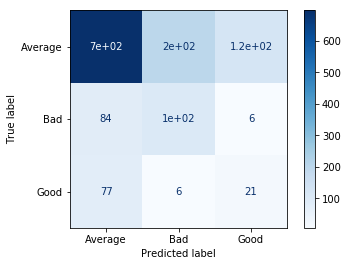

In [3]:
from sklearn.naive_bayes import GaussianNB


tuned_parameters = [{'var_smoothing': [1e-6, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}]

clf = GridSearchCV(GaussianNB(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [4]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.46784688 0.40684314 0.50850506 0.47039254 0.44540594]


### K best Data

In [5]:
#Load Kbest data
arr2= np.load('data_kBest.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[1 0 0 0 0]
 [0 0 0 0 1]
 [0 0 0 1 0]
 ...
 [0 0 0 1 0]
 [0 0 0 1 0]
 [0 0 0 0 1]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


Best parameters set found on development set:
 {'var_smoothing': 1e-06}

 Best Score 0.4126827945936202

 Grid scores on development set:
0.413 (+/-0.015) for {'var_smoothing': 1e-06}
0.413 (+/-0.015) for {'var_smoothing': 1e-07}
0.413 (+/-0.015) for {'var_smoothing': 1e-08}
0.413 (+/-0.015) for {'var_smoothing': 1e-09}
0.413 (+/-0.015) for {'var_smoothing': 1e-10}
0.413 (+/-0.015) for {'var_smoothing': 1e-11}
0.413 (+/-0.015) for {'var_smoothing': 1e-12}
0.413 (+/-0.015) for {'var_smoothing': 1e-13}
0.413 (+/-0.015) for {'var_smoothing': 1e-14}
0.413 (+/-0.015) for {'var_smoothing': 1e-15}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.79      0.85      0.82      1019
         Bad       0.38      0.25      0.30       191
        Good       0.06      0.05      0.05       104

    accuracy                           0.70      1314
   macro avg       0.41      0.38      0.39 

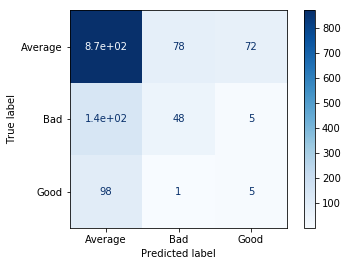

In [6]:
from sklearn.naive_bayes import GaussianNB


tuned_parameters = [{'var_smoothing': [1e-6, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}]

clf = GridSearchCV(GaussianNB(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [7]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.38111073 0.39904114 0.42525956 0.42575334 0.40788489]


### K select Percentile

In [8]:
#Load Kbest data
arr2= np.load('data_select_percentile.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[0.003947365799861489 0.027369683484445913 0.1383737517831669 0 0]
 [0.021052629002770076 0.05163376910306254 0.14122681883024252 0 1]
 [0.003947365799861489 0.004640614264768108 0.19115549215406563 1 0]
 ...
 [0.05263157645429362 0.013200240283036896 0.16690442225392296 1 0]
 [0.09210526076869806 0.04963356512358402 0.19543509272467904 1 0]
 [0.001973681584141267 0.012877102478217349 0.11269614835948645 0 1]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


Best parameters set found on development set:
 {'var_smoothing': 1e-06}

 Best Score 0.4929117336788589

 Grid scores on development set:
0.493 (+/-0.018) for {'var_smoothing': 1e-06}
0.493 (+/-0.018) for {'var_smoothing': 1e-07}
0.493 (+/-0.018) for {'var_smoothing': 1e-08}
0.493 (+/-0.018) for {'var_smoothing': 1e-09}
0.493 (+/-0.018) for {'var_smoothing': 1e-10}
0.493 (+/-0.018) for {'var_smoothing': 1e-11}
0.493 (+/-0.018) for {'var_smoothing': 1e-12}
0.493 (+/-0.018) for {'var_smoothing': 1e-13}
0.493 (+/-0.018) for {'var_smoothing': 1e-14}
0.493 (+/-0.018) for {'var_smoothing': 1e-15}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.82      0.81      0.81      1019
         Bad       0.37      0.48      0.42       191
        Good       0.26      0.14      0.19       104

    accuracy                           0.71      1314
   macro avg       0.48      0.48      0.47 

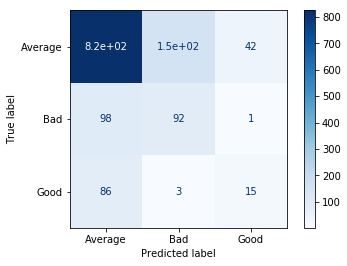

In [9]:
from sklearn.naive_bayes import GaussianNB


tuned_parameters = [{'var_smoothing': [1e-6, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}]

clf = GridSearchCV(GaussianNB(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [10]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.45944408 0.44042514 0.51328415 0.50160629 0.46270289]


### PCA

In [11]:
#Load Kbest data
arr2= np.load('data_pca.npy', allow_pickle= True)
X= arr2[:,0:-1]
Y= arr2[:,-1]


### Split arrays or matrices into random train and test subsets - 20% for Test, 80% to train
X_train, X_test, y_train, y_test= train_test_split(X, Y, test_size=0.20,  random_state = 200)

print(X_train,y_train)
print(len(X_train),len(y_train),len(X_test),len(y_test))

[[-0.2668990480532727 0.7955195541058508 -0.31189174404518605
  -0.06279000616091403]
 [-0.11249211937670339 0.11386167290926646 0.7960057304498621
  -0.566522736475527]
 [0.7533508178888383 -0.16531012330588044 -0.13103281872338923
  -0.029475859314786697]
 ...
 [0.7521852812229466 -0.16344152965792963 -0.13094237177940624
  -0.025483097537655243]
 [0.7517777704386579 -0.1613423366153525 -0.13139539788714713
  -0.020865925132946238]
 [-0.11242004274209731 0.11253824516972548 0.7963608411917731
  -0.5693779640319709]] ['Average' 'Average' 'Average' ... 'Average' 'Average' 'Average']
5253 5253 1314 1314


Best parameters set found on development set:
 {'var_smoothing': 1e-06}

 Best Score 0.3847345809637954

 Grid scores on development set:
0.385 (+/-0.004) for {'var_smoothing': 1e-06}
0.385 (+/-0.004) for {'var_smoothing': 1e-07}
0.385 (+/-0.004) for {'var_smoothing': 1e-08}
0.385 (+/-0.004) for {'var_smoothing': 1e-09}
0.385 (+/-0.004) for {'var_smoothing': 1e-10}
0.385 (+/-0.004) for {'var_smoothing': 1e-11}
0.385 (+/-0.004) for {'var_smoothing': 1e-12}
0.385 (+/-0.004) for {'var_smoothing': 1e-13}
0.385 (+/-0.004) for {'var_smoothing': 1e-14}
0.385 (+/-0.004) for {'var_smoothing': 1e-15}
Detailed classification report:
The scores are computed on the full evaluation set. 

              precision    recall  f1-score   support

     Average       0.79      0.92      0.85      1019
         Bad       0.38      0.25      0.30       191
        Good       0.00      0.00      0.00       104

    accuracy                           0.75      1314
   macro avg       0.39      0.39      0.39 

C:\Users\Tasli\Anaconda3\lib\site-packages\sklearn\metrics\_classification.py:1268: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


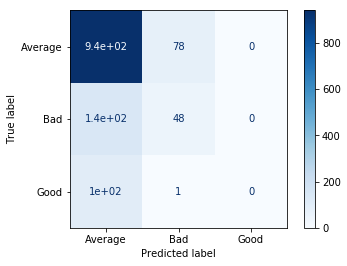

In [12]:
from sklearn.naive_bayes import GaussianNB


tuned_parameters = [{'var_smoothing': [1e-6, 1e-07, 1e-08, 1e-09, 1e-10, 1e-11, 1e-12, 1e-13, 1e-14, 1e-15]}]

clf = GridSearchCV(GaussianNB(), tuned_parameters, scoring='f1_macro')
clf.fit(X_train, y_train)


#Evaluation

print("Best parameters set found on development set:\n", clf.best_params_)
print("\n Best Score", clf.best_score_) 

print("\n Grid scores on development set:")
means = clf.cv_results_['mean_test_score']
stds = clf.cv_results_['std_test_score']
for mean, std, params in zip(means, stds, clf.cv_results_['params']):
    print("%0.3f (+/-%0.03f) for %r" % (mean, std, params))

print("Detailed classification report:")
print("The scores are computed on the full evaluation set. \n")
y_true, y_pred = y_test, clf.predict(X_test)
print(classification_report(y_true, y_pred))

#Lets print confision matrix
labels =['Average','Bad','Good']
disp = plot_confusion_matrix(clf, X_test, y_test,
                                 display_labels=labels,
                                 cmap=plt.cm.Blues)

print ('\nTesting score: ',clf.score (X_test, y_test)) # print the testing score(accuracy)
print ('\nTraining Score: ',clf.score (X_train, y_train)) # print the trainig score(accuracy)

In [13]:
#Cross Validate
from sklearn.model_selection import cross_validate
from sklearn.metrics import recall_score

scoring = ['f1_macro']
scores = cross_validate(clf, X, Y, cv=5, scoring=scoring)
print(sorted(scores.keys()))
print('test_f1_macro', scores['test_f1_macro'])

['fit_time', 'score_time', 'test_f1_macro']
test_f1_macro [0.34926968 0.36651582 0.39523109 0.40518801 0.40665368]
